<a href="https://colab.research.google.com/github/Specky9coder/Principal_Component_Analysis/blob/master/Principal_component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_breast_cancer



breast = load_breast_cancer()

breast_data = breast.data


In [0]:
breast_data.shape

(569, 30)

In [0]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [0]:
import numpy as np

In [0]:
labels = np.reshape(breast_labels,(569,1))

In [0]:
final_breast_data = np.concatenate([breast_data,labels],axis = 1)

In [0]:
final_breast_data.shape

(569, 31)

In [0]:
import pandas as pd

In [0]:
breast_dataset = pd.DataFrame(final_breast_data)

In [0]:
features = breast.feature_names

In [0]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
features_labels = np.append(features,'label')

In [0]:
breast_dataset.columns = features_labels

In [0]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [0]:
breast_dataset['label'].replace(0, 'Benign', inplace = True)
breast_dataset['label'].replace(1, 'Malignant', inplace = True)

In [0]:
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [0]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
(x_train,y_train),(X_test,Y_test) = cifar10.load_data() 

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
print('Training data shape :', x_train.shape)
print('Testing data shape:', X_test.shape)

Training data shape : (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [0]:
y_train.shape, Y_test.shape

((50000, 1), (10000, 1))

In [0]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of output :', nClasses)
print('Output classes:', classes)

Total number of output : 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
label_dict = {
    

0 : 'Airpane',
1 : 'Automobile',
2 : 'Cat',
3 : 'Bird',
4 : 'Dog',
5 : 'Deer',
6 : 'Frog',
7 : 'Sheep',
8 : 'Truck',
9 : 'Horse',



}

Text(0.5, 1.0, '(Label :Frog)')
Text(0.5, 1.0, '(Label :Bird)')


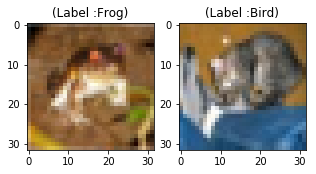

In [0]:
plt.figure(figsize = [5,5])

plt.subplot(121)

curr_img = np.reshape(x_train[0], (32, 32, 3) )

plt.imshow(curr_img)
print(plt.title('(Label :'  + str(label_dict[y_train[0][0]])+ ')'))

plt.subplot(122)

curr_img = np.reshape(X_test[0], (32, 32, 3))
plt.imshow(curr_img)
print(plt.title('(Label :'  + str(label_dict[Y_test[0][0]])+ ')'))


In [0]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) 

In [0]:
x.shape

(569, 30)

In [0]:
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

In [0]:
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]

In [0]:
normalised_breast = pd.DataFrame(x, columns = feat_cols)

In [0]:
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [0]:
from sklearn.decomposition import PCA

pca_breast = PCA(n_components = 2)

principalComponents_breast = pca_breast.fit_transform(x)

In [0]:
principal_breast_Df = pd.DataFrame(data = principalComponents_breast
                                   , columns =['principal component 1', 'principal component 2'])

In [0]:
principal_breast_Df.tail()

,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [0]:
print('Explined variation per principal component : {}'.format(pca_breast.explained_variance_ratio_) )

Explined variation per principal component : [0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

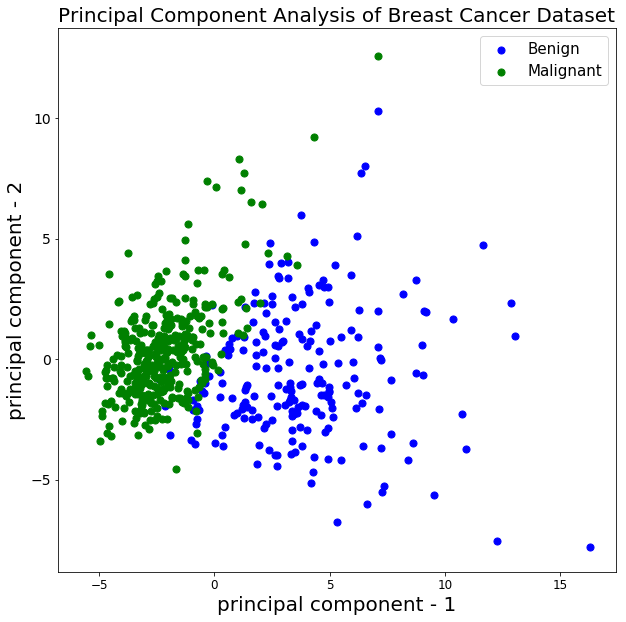

In [0]:
plt.figure()
plt.figure(figsize = (10,10))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('principal component - 1', fontsize = 20)
plt.ylabel('principal component - 2', fontsize = 20)
plt.title ('Principal Component Analysis of Breast Cancer Dataset', fontsize = 20)

targets = ('Benign' , 'Malignant')
colors = ('b' , 'g')


for target, color in zip(targets , colors):
  
  indicesTokeep = breast_dataset['label'] == target
  
  plt.scatter(principal_breast_Df.loc[indicesTokeep , 'principal component 1']
             , principal_breast_Df.loc[indicesTokeep , 'principal component 2']
              , c =  color , s = 50)
  plt.legend(targets, prop ={'size' : 15} )
  

In [0]:
np.min(x_train),np.max(x_train)

(0, 255)

In [0]:
x_train = x_train/255.0

In [0]:
np.min(x_train), np.max(x_train)

(0.0, 1.0)

In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_train_flat = x_train.reshape(-1, 3072)

In [0]:
feat_cols = ['pixels' + str(i) for i in range(x_train_flat.shape[1])]

In [0]:
df_cifar = pd.DataFrame(x_train_flat, columns = feat_cols
                       )

In [0]:
df_cifar['label'] = y_train
print('Size Of The DataFrame : {}'.format(df_cifar.shape))

Size Of The DataFrame : (50000, 3073)


In [0]:
df_cifar.head()

,pixels0,pixels1,pixels2,pixels3,pixels4,pixels5,pixels6,pixels7,pixels8,pixels9,pixels10,pixels11,pixels12,pixels13,pixels14,pixels15,pixels16,pixels17,pixels18,pixels19,pixels20,pixels21,pixels22,pixels23,pixels24,pixels25,pixels26,pixels27,pixels28,pixels29,pixels30,pixels31,pixels32,pixels33,pixels34,pixels35,pixels36,pixels37,pixels38,pixels39,...,pixels3033,pixels3034,pixels3035,pixels3036,pixels3037,pixels3038,pixels3039,pixels3040,pixels3041,pixels3042,pixels3043,pixels3044,pixels3045,pixels3046,pixels3047,pixels3048,pixels3049,pixels3050,pixels3051,pixels3052,pixels3053,pixels3054,pixels3055,pixels3056,pixels3057,pixels3058,pixels3059,pixels3060,pixels3061,pixels3062,pixels3063,pixels3064,pixels3065,pixels3066,pixels3067,pixels3068,pixels3069,pixels3070,pixels3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,0.211765,0.164706,0.384314,0.286275,0.203922,0.466667,0.356863,0.247059,0.545098,0.419608,0.294118,0.568627,0.431373,0.313725,0.584314,0.458824,0.349020,0.584314,0.470588,0.364706,0.513725,0.403922,0.301961,0.490196,0.388235,0.298039,0.556863,0.450980,0.356863,0.564706,...,0.580392,0.403922,0.301961,0.631373,0.411765,0.270588,0.564706,0.372549,0.215686,0.439216,0.352941,0.231373,0.466667,0.356863,0.227451,0.509804,0.376471,0.254902,0.470588,0.341176,0.231373,0.360784,0.262745,0.180392,0.403922,0.305882,0.223529,0.666667,0.549020,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,0.396078,0.388235,0.490196,0.513725,0.545098,0.607843,0.650980,0.705882,0.674510,0.745098,0.823529,0.705882,0.780392,0.839216,0.556863,0.611765,0.611765,0.435294,0.470588,0.431373,0.415686,0.419608,0.384314,0.427451,0.407843,0.400000,0.482353,0.474510,0.458824,0.498039,...,0.019608,0.023529,0.043137,0.023529,0.023529,0.043137,0.039216,0.035294,0.047059,0.098039,0.086275,0.086275,0.200000,0.176471,0.164706,0.266667,0.250980,0.262745,0.352941,0.352941,0.396078,0.454902,0.443137,0.478431,0.525490,0.498039,0.521569,0.549020,0.509804,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.298039,0.352941,0.352941,0.282353,0.337255,0.337255,0.250980,0.305882,0.305882,0.250980,0.305882,0.305882,0.270588,0.325490,0.325490,0.258824,0.313725,0.313725,0.215686,0.270588,0.270588,0.203922,0.258824,0.258824,0.227451,0.282353,0.282353,0.266667,0.313725,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,0.145098,0.090196,0.172549,0.152941,0.098039,0.156863,0.145098,0.086275,0.156863,0.149020,0.090196,0.094118,0.090196,0.035294,0.125490,0.098039,0.058824,0.168627,0.105882,0.074510,0.117647,0.078431,0.039216,0.125490,0.117647,0.066667,0.160784,0.145098,0.090196,0.203922,...,0.478431,0.388235,0.262745,0.419608,0.333333,0.211765,0.439216,0.376471,0.258824,0.360784,0.317647,0.207843,0.313725,0.243137,0.152941,0.376471,0.305882,0.231373,0.301961,0.262745,0.164706,0.333333,0.298039,0.172549,0.329412,0.294118,0.188235,0.262745,0.223529,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,0.756863,0.827451,0.709804,0.768627,0.854902,0.694118,0.764706,0.862745,0.709804,0.764706,0.874510,0.721569,0.752941,0.874510,0.741176,0.745098,0.874510,0.741176,0.741176,0.870588,0.737255,0.756863,0.878431,0.717647,0.760784,0.874510,0.713725

In [0]:
pca_cifar = PCA(n_components = 2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:, : -1])

In [0]:
principal_cifar_Df = pd.DataFrame(principalComponents_cifar
                   , columns = ['Principal Component 1', 'Principal Component 2'])
principal_cifar_Df['y'] = y_train

In [0]:
principal_cifar_Df.head()

,Principal Component 1,Principal Component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [0]:
print('Explained variations per principal component : {}'.format(pca_cifar.explained_variance_ratio_))

Explained variations per principal component : [0.2907663  0.11253144]


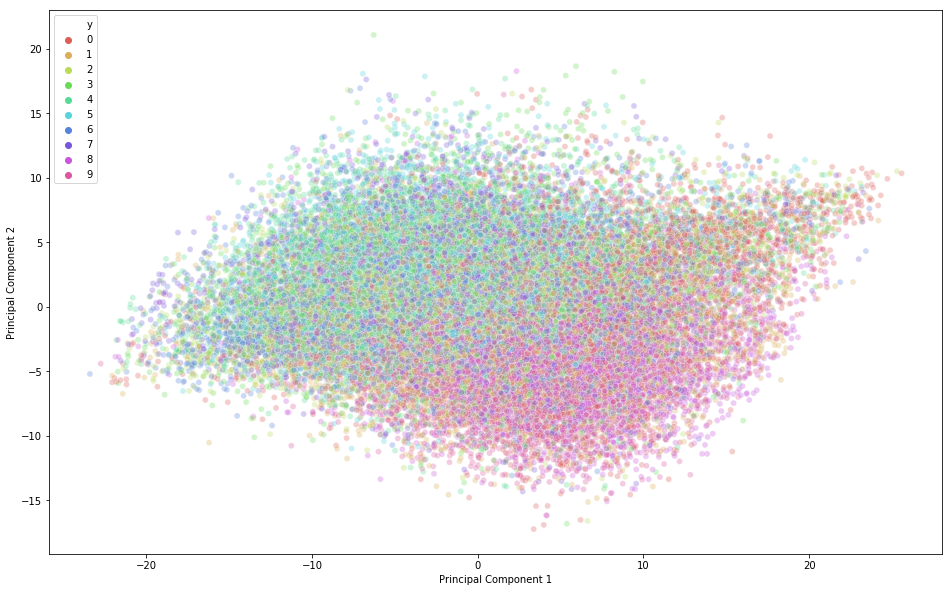

In [0]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
     x = 'Principal Component 1', y = 'Principal Component 2',
    hue = 'y',
    palette = sns.color_palette('hls', 10),
    data=principal_cifar_Df,
    legend='full',
    alpha=0.3
)

In [0]:
X_test = X_test/255.0

In [0]:
X_test = X_test.reshape(-1, 32, 32, 3)

In [0]:
X_test_flat = X_test.reshape(-1, 3072)

In [0]:
pca = PCA(0.9)

In [0]:
pca.fit(x_train_flat)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
pca.n_components_

99

In [0]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(X_test_flat)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

In [0]:
y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(Y_test)

In [0]:
batch_size = 128
num_classes = 10
epochs = 20

In [0]:
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_shape = (99,)))
model.add(Dense(1024 , activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [0]:
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 55us/step - loss: 1.6313 - acc: 0.4209 - val_loss: 1.4290 - val_acc: 0.4932
Epoch 2/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.3174 - acc: 0.5351 - val_loss: 1.3570 - val_acc: 0.5189
Epoch 3/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.1402 - acc: 0.5961 - val_loss: 1.2968 - val_acc: 0.5498
Epoch 4/20
50000/50000 [==============================] - 2s 34us/step - loss: 0.9806 - acc: 0.6497 - val_loss: 1.3118 - val_acc: 0.5408
Epoch 5/20
50000/50000 [==============================] - 2s 33us/step - loss: 0.8309 - acc: 0.7057 - val_loss: 1.4012 - val_acc: 0.5581
Epoch 6/20
50000/50000 [==============================] - 2s 34us/step - loss: 0.6884 - acc: 0.7528 - val_loss: 1.4345 - val_acc: 0.5600
Epoch 7/20
50000/50000 [==============================] - 2s 33us/step - loss: 0.5669 - acc: 0.7960 - val_loss: 1.5363 - val_acc

In [0]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(X_test_flat, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 146us/step - loss: 3.0027 - acc: 0.2274 - val_loss: 1.9037 - val_acc: 0.3002
Epoch 2/20
50000/50000 [==============================] - 6s 123us/step - loss: 1.8469 - acc: 0.3351 - val_loss: 1.7914 - val_acc: 0.3530
Epoch 3/20
50000/50000 [==============================] - 6s 123us/step - loss: 1.7432 - acc: 0.3762 - val_loss: 1.7453 - val_acc: 0.3593
Epoch 4/20
50000/50000 [==============================] - 6s 123us/step - loss: 1.6671 - acc: 0.4023 - val_loss: 1.6595 - val_acc: 0.4029
Epoch 5/20
50000/50000 [==============================] - 6s 123us/step - loss: 1.6181 - acc: 0.4209 - val_loss: 1.7104 - val_acc: 0.3847
Epoch 6/20
50000/50000 [==============================] - 6s 123us/step - loss: 1.5669 - acc: 0.4393 - val_loss: 1.6536 - val_acc: 0.3917
Epoch 7/20
50000/50000 [==============================] - 6s 123us/step - loss: 1.5281 - acc: 0.4558 - val_loss: 1.6725 - 